In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('data_kemeja.csv', sep=';')
df

,bahan,warna_kemeja,tipe_kerah,tipe_lengan,motif,posisi_motif,warna_motif,harga,penjualan
0,Katun Oxford,Hijau,Straight Collar,Lengan Panjang,Polos,Tidak Ada,Tidak Ada,149000,Rendah
1,Katun Oxford,Army,Straight Collar,Lengan Panjang,Polos,Tidak Ada,Tidak Ada,149000,Rendah
2,Katun Oxford,Coklat Muda,Straight Collar,Lengan Pendek,Polos,Tidak Ada,Tidak Ada,129000,Rendah
3,Katun Oxford,Coklat,Straight Collar,Lengan Panjang,Polos,Tidak Ada,Tidak Ada,149000,Tinggi
4,Katun Oxford,Khaki,Straight Collar,Lengan Panjang,Polos,Tidak Ada,Tidak Ada,149000,Rendah
...,...,...,...,...,...,...,...,...,...
398,Katun,Coklat,Straight Collar,Lengan Panjang,Batik,Area Bawah,Krem Coklat,169000,Rendah
399,Katun,Navy,Straight Collar,Lengan Panjang,Batik,Area Atas,Krem Coklat,169000,Rendah
400,Katun,Coklat,Straight Collar,Lengan Panjang,Batik,Full,Krem Hitam,169000,Tinggi
401,Katun,Putih,Straight Collar,Lengan Panjang,Batik,Full,Coklat Hitam,169000,Tinggi


In [3]:
from sklearn.model_selection import train_test_split

#split the data into train and test set
train,test = train_test_split(df, test_size=0.2, random_state=1)

#save the data
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [4]:
train

,bahan,warna_kemeja,tipe_kerah,tipe_lengan,motif,posisi_motif,warna_motif,harga,penjualan
185,Kain Flanel,Maroon,Straight Collar,Lengan Panjang,Square Pattern,Full,Hitam,169000,Rendah
227,Katun Oxford,Abu,Straight Collar,Lengan Pendek,Stripes,Dada Horizontal,Putih,129000,Rendah
245,Katun,Abu,Shanghai Collar,Lengan Panjang,Polos,Tidak Ada,Tidak Ada,149000,Rendah
23,Katun Oxford,Abu,Straight Collar,Lengan Pendek,Polos,Tidak Ada,Tidak Ada,129000,Tinggi
321,Katun Rayon Twill,Navy,Straight Collar,Lengan Pendek,Flower,Full,Hijau,119000,Rendah
...,...,...,...,...,...,...,...,...,...
255,Katun Oxford,Abu,Shanghai Collar,Lengan Panjang,Line,Dada Horizontal,Navy,149000,Rendah
72,Katun Oxford,Abu,Straight Collar,Lengan Pendek,Area,Dada Diagonal,Hitam Putih,129000,Rendah
396,Katun,Hitam,Straight Collar,Lengan Panjang,Batik,Area Atas,Krem Coklat,169000,Rendah
235,Katun Yarndyed,Abu,Straight Collar,Lengan Pendek,Stripes,Dada Horizontal,Navy Biru,129000,Rendah


In [5]:
test

,bahan,warna_kemeja,tipe_kerah,tipe_lengan,motif,posisi_motif,warna_motif,harga,penjualan
360,Katun,Navy,Straight Collar,Lengan Panjang,Batik,Full,Putih Navy,169000,Rendah
62,Katun Oxford,Putih,Straight Collar,Lengan Pendek,2 Line,Dada Lengan Kiri,Navy Abu,129000,Rendah
374,Katun,Navy,Straight Collar,Lengan Pendek,Batik,Full,Coklat Putih,149000,Rendah
92,Katun Linen,Navy,Shanghai Collar,Lengan Panjang,Koko Pattern,Dada Horizontal,Putih Biru,179000,Rendah
146,Katun Linen,Biru,Shanghai Collar,Lengan Panjang,Line,Dada Horizontal,Navy,179000,Tinggi
...,...,...,...,...,...,...,...,...,...
11,Katun Oxford,Army,Straight Collar,Lengan Panjang,Polos,Tidak Ada,Tidak Ada,149000,Rendah
363,Katun,Putih,Straight Collar,Lengan Panjang,Batik,Full,Coklat Kuning,169000,Rendah
300,Katun Oxford,Putih,Shanghai Collar,Lengan Panjang,Polos,Tidak Ada,Tidak Ada,149000,Rendah
41,Katun Oxford,Navy,Straight Collar,Lengan Pendek,3 Line,Dada Horizontal,Putih Biru,129000,Rendah


In [6]:
#encode category to numeric
df['bahan'] = pd.factorize(df['bahan'], sort=True)[0]
df['warna_kemeja'] = pd.factorize(df['warna_kemeja'], sort=True)[0]
df['tipe_kerah'] = pd.factorize(df['tipe_kerah'], sort=True)[0]
df['tipe_lengan'] = pd.factorize(df['tipe_lengan'], sort=True)[0]
df['motif'] = pd.factorize(df['motif'], sort=True)[0]
df['posisi_motif'] = pd.factorize(df['posisi_motif'], sort=True)[0]
df['warna_motif'] = pd.factorize(df['warna_motif'], sort=True)[0]
df['penjualan'] = pd.factorize(df['penjualan'], sort=True)[0]
df

,bahan,warna_kemeja,tipe_kerah,tipe_lengan,motif,posisi_motif,warna_motif,harga,penjualan
0,3,10,2,0,16,24,91,149000,0
1,3,3,2,0,16,24,91,149000,0
2,3,8,2,1,16,24,91,129000,0
3,3,7,2,0,16,24,91,149000,1
4,3,13,2,0,16,24,91,149000,0
...,...,...,...,...,...,...,...,...,...
398,1,7,2,0,5,1,42,169000,0
399,1,19,2,0,5,0,42,169000,0
400,1,7,2,0,5,9,43,169000,1
401,1,23,2,0,5,9,19,169000,1


In [7]:
#split the data into train and test set
train,test = train_test_split(df, test_size=0.2, random_state=1)

#save the data
train.to_csv('train_encode.csv',index=False)
test.to_csv('test_encode.csv',index=False)

In [8]:
train

,bahan,warna_kemeja,tipe_kerah,tipe_lengan,motif,posisi_motif,warna_motif,harga,penjualan
185,0,16,2,0,19,9,31,169000,0
227,3,0,2,1,20,3,76,129000,0
245,1,0,1,0,16,24,91,149000,0
23,3,0,2,1,16,24,91,129000,1
321,5,19,2,1,8,9,26,119000,0
...,...,...,...,...,...,...,...,...,...
255,3,0,1,0,11,3,64,149000,0
72,3,0,2,1,4,2,39,129000,0
396,1,12,2,0,5,0,42,169000,0
235,7,0,2,1,20,3,66,129000,0


In [9]:
test

,bahan,warna_kemeja,tipe_kerah,tipe_lengan,motif,posisi_motif,warna_motif,harga,penjualan
360,1,19,2,0,5,9,88,169000,0
62,3,23,2,1,0,6,65,129000,0
374,1,19,2,1,5,9,25,149000,0
92,2,19,1,0,9,3,78,179000,0
146,2,5,1,0,11,3,64,179000,1
...,...,...,...,...,...,...,...,...,...
11,3,3,2,0,16,24,91,149000,0
363,1,23,2,0,5,9,21,169000,0
300,3,23,1,0,16,24,91,149000,0
41,3,19,2,1,1,3,78,129000,0


In [10]:
df = pd.read_csv('train_encode.csv')

X_train= df.values
X_train = np.delete(X_train, 8, axis=1)

y_train = df['penjualan'].values

df = pd.read_csv('test_encode.csv')

X_test= df.values
X_test = np.delete(X_test, 8, axis=1)

y_test = df['penjualan'].values

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(322, 8)
(322,)
(81, 8)
(81,)


In [11]:
nb_clf = GaussianNB()

nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

round(accuracy_score(y_test,y_pred),3)

0.778

In [12]:
#Save PICKLE

import pickle

with open('nb_pickle','wb') as r:
    pickle.dump(nb_clf,r)

In [13]:
with open('nb_pickle','rb') as r:
    nbp = pickle.load(r)

In [14]:
y_pred = nbp.predict(X_test)

round(accuracy_score(y_test,y_pred),3)

0.778

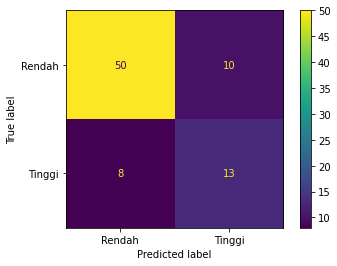

In [20]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Rendah', 'Tinggi'])
cm_display.plot()
plt.show()